In [12]:
import pandas as pd

In [13]:
from sqlite3 import connect

In [14]:
opsim_db = connect('baseline_v2.0_10yrs.db')

In [15]:
opsim_file = pd.read_sql('select * from observations limit 1000', opsim_db)

In [16]:
opsim_file.columns

Index(['observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'flush_by_mjd', 'visitExposureTime', 'filter', 'rotSkyPos',
       'numExposures', 'airmass', 'seeingFwhm500', 'seeingFwhmEff',
       'seeingFwhmGeom', 'skyBrightness', 'night', 'slewTime', 'visitTime',
       'slewDistance', 'fiveSigmaDepth', 'altitude', 'azimuth', 'paraAngle',
       'cloud', 'moonAlt', 'sunAlt', 'note', 'fieldId', 'proposalId',
       'block_id', 'observationStartLST', 'rotTelPos', 'moonAz', 'sunAz',
       'sunRA', 'sunDec', 'moonRA', 'moonDec', 'moonDistance', 'solarElong',
       'moonPhase', 'cummTelAz'],
      dtype='object')

In [17]:
'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'fieldId', 'filter', 'fiveSigmaDepth'

('observationId',
 'fieldRA',
 'fieldDec',
 'observationStartMJD',
 'fieldId',
 'filter',
 'fiveSigmaDepth')

In [18]:
band_obs = pd.read_sql_query('SELECT observationId, fieldRA, fieldDec, observationStartMJD, fieldId, filter, fiveSigmaDepth FROM observations', opsim_db)

In [19]:
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth
0,0,310.024480,-60.812928,60218.001806,-1,y,22.370557
1,1,310.601871,-63.561425,60218.002254,-1,y,22.338327
2,2,311.292611,-66.317774,60218.002703,-1,y,22.295487
3,3,312.140731,-69.082666,60218.003152,-1,y,21.270421
4,4,304.170163,-73.375442,60218.003624,-1,y,21.205276
...,...,...,...,...,...,...,...
2086975,2086975,338.528926,-55.399555,63870.104267,-1,y,21.917628
2086976,2086976,347.380828,-54.922128,63870.104758,-1,y,21.864586
2086977,2086977,350.974688,-52.986827,63870.105219,-1,y,21.871581
2086978,2086978,356.062503,-53.778759,63870.105677,-1,y,21.850527


In [20]:
import matplotlib.pyplot as plt
%matplotlib Inline

Text(0, 0.5, 'DEC')

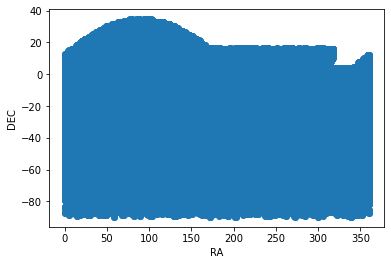

In [23]:
plt.scatter(band_obs['fieldRA'], band_obs['fieldDec'])
plt.xlabel('RA')
plt.ylabel('DEC')

In [24]:
import matplotlib as npl

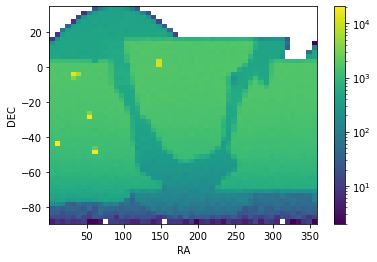

In [25]:
plt.hist2d(band_obs['fieldRA'], band_obs['fieldDec'], bins = 50, norm=npl.colors.LogNorm())
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

In [26]:
import numpy as np

In [27]:
find_max_RA = np.max(band_obs['fieldRA'])
find_min_RA = np.min(band_obs['fieldRA'])
find_max_DEC = np.max(band_obs['fieldDec'])
find_min_DEC = np.min(band_obs['fieldDec'])
num_bins = 50

In [28]:
RA_set = np.linspace(find_min_RA, find_max_RA, num_bins+1)
DEC_set = np.linspace(find_min_DEC, find_max_DEC, num_bins+1)

In [29]:
RA_bins = np.digitize(band_obs['fieldRA'], RA_set, right=True)
RA_bins

array([44, 44, 44, ..., 49, 50, 49])

In [30]:
DEC_bins = np.digitize(band_obs['fieldDec'], DEC_set, right=True)
DEC_bins

array([12, 11, 10, ..., 15, 15, 14])

In [31]:
band_obs['RABins'] = RA_bins
band_obs['DECBins'] = DEC_bins

In [32]:
new_field_id = (RA_bins-1) * 50 + DEC_bins
band_obs['fieldId'] = new_field_id
band_obs

,observationId,fieldRA,fieldDec,observationStartMJD,fieldId,filter,fiveSigmaDepth,RABins,DECBins
0,0,310.024480,-60.812928,60218.001806,2162,y,22.370557,44,12
1,1,310.601871,-63.561425,60218.002254,2161,y,22.338327,44,11
2,2,311.292611,-66.317774,60218.002703,2160,y,22.295487,44,10
3,3,312.140731,-69.082666,60218.003152,2159,y,21.270421,44,9
4,4,304.170163,-73.375442,60218.003624,2107,y,21.205276,43,7
...,...,...,...,...,...,...,...,...,...
2086975,2086975,338.528926,-55.399555,63870.104267,2364,y,21.917628,48,14
2086976,2086976,347.380828,-54.922128,63870.104758,2415,y,21.864586,49,15
2086977,2086977,350.974688,-52.986827,63870.105219,2415,y,21.871581,49,15
2086978,2086978,356.062503,-53.778759,63870.105677,2465,y,21.850527,50,15


In [33]:
r_filter = band_obs.query('fieldId == 2403 and filter == "r"')
g_filter = band_obs.query('fieldId == 2403 and filter == "g"')
print(r_filter, g_filter)

         observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
772                772  349.857034 -82.633511         60218.357890     2403   
846124          846124  349.132762 -83.345848         61682.142242     2403   
860288          860288  349.770490 -84.147058         61703.077226     2403   
1680668        1680668  349.123067 -82.933787         63159.185750     2403   
1875208        1875208  346.865503 -83.230118         63536.152786     2403   

        filter  fiveSigmaDepth  RABins  DECBins  
772          r       22.115278      49        3  
846124       r       23.833470      49        3  
860288       r       23.336416      49        3  
1680668      r       23.423731      49        3  
1875208      r       23.918868      49        3            observationId     fieldRA   fieldDec  observationStartMJD  fieldId  \
1259256        1259256  351.795196 -83.451359         62442.066218     2403   
1478871        1478871  346.629750 -83.641666         62802.056051 

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = '/home/jovyan/uw-premap-2022-photoz/data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [35]:
fdir = os.getenv('RUBIN_SIM_DATA_DIR')
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')

fdir = '/home/jovyan/uw-premap-2022-photoz/data/lsst_baseline_throughputs'

!ls $fdir

atmos_10.dat   filter_r.dat    hardware_r.dat  lens3.dat	total_g.dat
atmos_std.dat  filter_u.dat    hardware_u.dat  LSSTfilters.png	total_i.dat
darksky.dat    filter_y.dat    hardware_y.dat  m1.dat		total_r.dat
detector.dat   filter_z.dat    hardware_z.dat  m2.dat		total_u.dat
filter_g.dat   hardware_g.dat  lens1.dat       m3.dat		total_y.dat
filter_i.dat   hardware_i.dat  lens2.dat       README.md	total_z.dat


In [36]:
import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed

In [37]:
sun = Sed()
sun.readSED_flambda('/home/jovyan/uw-premap-2022-photoz/data/sed_templates/CWW_KINNEY/CWW_E_ext.sed')
sun.wavelen/=10

In [38]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']

lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].readThroughput(os.path.join(fdir, f'total_{f}.dat'))
    
mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])

# Make a dataframe just to get a nice output cell.
pd.DataFrame(mags, index=['Sun']).T

,Sun
u,-4.150003
g,-5.896804
r,-6.622219
i,-6.974888
z,-7.233845
y,-7.425142


In [39]:
r = 20.0

fluxNorm = sun.calcFluxNorm(r, lsst['r'])

sun.multiplyFluxNorm(fluxNorm)

mags = {}
for f in filterlist:
    mags[f] = sun.calcMag(lsst[f])
    
pd.DataFrame(mags, index=['Distant Sun']).T

,Distant Sun
u,22.472216
g,20.725415
r,20.000000
i,19.647330
z,19.388374
y,19.197076


In [40]:
from rubin_sim.photUtils import SignalToNoise
from rubin_sim.photUtils import PhotometricParameters

In [41]:
SignalToNoise.calcMagError_m5(magnitude=20, bandpass=lsst['r'], m5=24, photParams=PhotometricParameters())
SignalToNoise.calcMagError_m5(magnitude=20.725415, bandpass=lsst['g'], m5=24, photParams=PhotometricParameters())

(0.013139422508835895, 0.03934261437469505)

In [42]:
mag_error_r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 22.115278, PhotometricParameters())
mag_error_2r, gamma = SignalToNoise.calcMagError_m5(20, lsst['r'], 23.833470, PhotometricParameters())
print(mag_error_r)
print(mag_error_2r)

0.031221444804164934
0.009322245115585407


In [43]:
mag_error_g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 23.803613 , PhotometricParameters())
mag_error_2g, gamma = SignalToNoise.calcMagError_m5(20.725415, lsst['g'], 24.005959, PhotometricParameters())
print(mag_error_g, mag_error_2g)

0.014857161547721024 0.013093479367888855


In [44]:
mag_2 = 20
mag_1 = 20.725415
def combine_col_err(mag_1, mag_2, err_1, err_2):
    return mag_1-mag_2, np.sqrt(mag_error_g**2 + mag_error_r**2)

In [45]:
gmr_error = combine_col_err(mag_1, mag_2, mag_error_g, mag_error_r)

In [46]:
gmr_error

(0.7254150000000017, 0.0345762037377529)

In [48]:
from copy import copy
from scipy.stats import norm
g_r = []
g_r_err = []
pdf_list = []
r = 24.5
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    gr_color = mags['g'] - mags['r']
    gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
    pdf_list.append(norm(loc = gr_color, scale = gr_error))
    g_r.append(mags['g'] - mags['r'])
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], 23.803613 , PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], 22.115278, PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
    
    

print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.127568839165825, 2.2677011843884642, 2.1867075250048273, 1.8528072436778764, 1.4936730257263982, 1.1240496109998404, 0.8557468597614317, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.7750666481098385, 0.7663830025511693, 0.7227059844917534, 0.6590263915621257, 0.5962345500838815, 0.5445307149382153, 0.508888128898807, 0.4915751575070537, 0.4913180779593205, 0.5034478075371531, 0.5257928424279541, 0.5554684677789687] [1.2671476607381404, 1.3077948000368305, 1.393819183964462, 1.500235956268231, 1.5972065577364405, 1.5482105621614457, 1.522709331607012, 1.5509962136236233, 1.6688454209977568, 1.8015981164084949, 1.8841186665033087, 1.8358238191244365, 1.6545776846994644, 1.4936518602014357, 1.3655781774662794, 1.2951559621782334, 1.26603345029476, 1.2640125069440578, 1.2716829212329661, 1.2773683615

In [49]:
# g_r_err on x-axis, g_r on y-axis

Text(0, 0.5, 'Color')

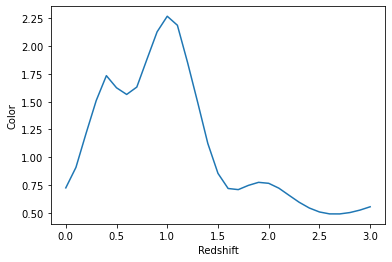

In [50]:
redshift_r = np.arange(0,3.1,0.1)
plt.plot(redshift_r, g_r)
plt.xlabel("Redshift")
plt.ylabel("Color")

In [51]:
g_r[0], g_r_err[0]

(0.7254152168005632, 1.2671476607381404)

In [52]:
gal_z_0 = norm(loc=g_r[0], scale=g_r_err[0])
gal_z_0p5 = norm(loc=g_r[5], scale=g_r_err[5])
gal_z_1p0 = norm(loc=g_r[10], scale=g_r_err[10])

In [53]:
np.min(g_r), np.max(g_r)

(0.4913180779593205, 2.2677011843884642)

In [54]:
color_range = np.arange(-4,8, 0.01)

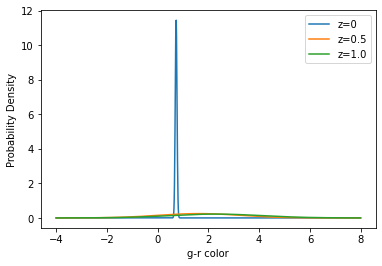

In [55]:
plt.plot(color_range, pdf_list[0].pdf(color_range), label = 'z=0')
plt.plot(color_range, pdf_list[5].pdf(color_range), label = 'z=0.5')
plt.plot(color_range, pdf_list[10].pdf(color_range), label = 'z=1.0')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [56]:
combined_pdf = np.zeros(len(color_range))
for galaxy in pdf_list:
    combined_pdf += galaxy.pdf(color_range)
combined_pdf = combined_pdf / 31

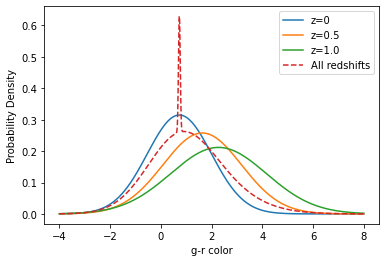

In [57]:
plt.plot(color_range, gal_z_0.pdf(color_range), label = 'z=0')
plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf, '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

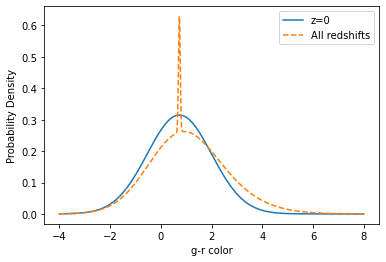

In [58]:
plt.plot(color_range, gal_z_0.pdf(color_range), label = 'z=0')
#plt.plot(color_range, gal_z_0p5.pdf(color_range), label = 'z=0.5')
#plt.plot(color_range, gal_z_1p0.pdf(color_range), label = 'z=1.0')
plt.plot(color_range, combined_pdf, '--', label = 'All redshifts')
plt.xlabel('g-r color')
plt.ylabel('Probability Density')
plt.legend()

In [59]:
from scipy.special import kl_div, rel_entr
np.sum(0.01*gal_z_0.pdf(color_range))

0.9999054378812255

In [60]:
np.sum(kl_div(0.01*gal_z_0.pdf(color_range), 0.01*combined_pdf))

0.05924598992072891

In [61]:
kl_divergence = []
for galaxy in pdf_list:
    kl_divergence.append(np.sum(kl_div(0.01*galaxy.pdf(color_range), 0.01*combined_pdf)))
print(kl_divergence)

[2.6158978012398757, 0.04037101071020403, 0.03688559225355341, 0.06496188911820144, 0.107060736719677, 0.07783323729400943, 0.06510945724298636, 0.07997126742311234, 0.14818269955352908, 0.23482711957222413, 0.29789693664579986, 0.2728690568587029, 0.1549336629853393, 0.05602373733384826, 0.016809831148905004, 0.0317367455268414, 0.055939357148051774, 0.06181719099282502, 0.05658647450722469, 0.0517765526524958, 0.051969054254944844, 0.058324591333192816, 0.07022734537414602, 0.08450219766820097, 0.0979797474257795, 0.1082569393949252, 0.11376874401438801, 0.11433682895149902, 0.11119848503454338, 0.10524570539541452, 0.09753728278079743]


In [62]:
print(r_filter['fiveSigmaDepth'])
print(g_filter['fiveSigmaDepth'])

print(1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth']))))
print(1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth']))))

772        22.115278
846124     23.833470
860288     23.336416
1680668    23.423731
1875208    23.918868
Name: fiveSigmaDepth, dtype: float64
1259256    24.005959
1478871    23.803613
1680618    23.770814
Name: fiveSigmaDepth, dtype: float64
24.444680387674623
24.466854221562045


In [63]:
from copy import copy
g_r = []
g_r_err = []
pdf_list = []
r = 24.5
for redshift in np.arange(0,3.1,0.1):
    sun_copy = copy(sun)
    sun_copy.redshiftSED(redshift)
    mags = {}
    fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
    sun_copy.multiplyFluxNorm(fluxNorm)
    mags = {}
    for f in filterlist:
        mags[f] = sun_copy.calcMag(lsst[f])
        pd.DataFrame(mags, index=['Distant Sun']).T
    gr_color = mags['g'] - mags['r']
    gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
    pdf_list.append(norm(loc = gr_color, scale = gr_error))
    g_r.append(mags['g'] - mags['r'])
    mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], 24.466854221562045, PhotometricParameters())
    mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], 24.444680387674623, PhotometricParameters())
    g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
    
    

print(g_r, g_r_err)

[0.7254152168005632, 0.9092875263745306, 1.21556563554606, 1.5101335745430582, 1.7336961338800663, 1.6247841723966872, 1.564944229071827, 1.6311809361247, 1.8812287964095908, 2.127568839165825, 2.2677011843884642, 2.1867075250048273, 1.8528072436778764, 1.4936730257263982, 1.1240496109998404, 0.8557468597614317, 0.7198391764086622, 0.7096387142844485, 0.747772632412822, 0.7750666481098385, 0.7663830025511693, 0.7227059844917534, 0.6590263915621257, 0.5962345500838815, 0.5445307149382153, 0.508888128898807, 0.4915751575070537, 0.4913180779593205, 0.5034478075371531, 0.5257928424279541, 0.5554684677789687] [0.41982945529855176, 0.46880636273545284, 0.5672143322905607, 0.6827928974753288, 0.7846200282200531, 0.7334844711047271, 0.7066253818004171, 0.7364075459670827, 0.8585062123977024, 0.9935506488594374, 1.0767193423893164, 1.0280989667680123, 0.8438610074007439, 0.6757790343834338, 0.5355349503526275, 0.45378819735732756, 0.41845711583359857, 0.4159634584629582, 0.4253974729530458, 0.4

In [64]:
combined_pdf = np.zeros(len(color_range))
for galaxy in pdf_list:
    combined_pdf += galaxy.pdf(color_range)
combined_pdf = combined_pdf / 31

In [65]:
kl_divergence = []
for galaxy in pdf_list:
    kl_divergence.append(np.sum(kl_div(0.01*galaxy.pdf(color_range), 0.01*combined_pdf)))
print(kl_divergence)

[0.45434071029585427, 0.25149509200475184, 0.33226157710986476, 0.4073365145822222, 0.4538156283503637, 0.2871108131405269, 0.2777065239973346, 0.3472132801310257, 0.5331323094250376, 0.6793641357575867, 0.7627447944976482, 0.6623560679334992, 0.3806778511421105, 0.183840786241873, 0.09796199205069143, 0.13995250751231916, 0.22162096092566658, 0.25664862516318154, 0.24964924848678374, 0.23514490855211911, 0.22914882732260528, 0.24120565877674005, 0.27628331725849353, 0.3278125599320494, 0.38261695465411755, 0.42808886158033027, 0.4544495436487661, 0.4588266249439701, 0.44617885716440664, 0.4214076299308225, 0.3900012304875551]


In [66]:
np.mean(kl_divergence)

0.3635611094516231

In [69]:
result_r = 1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth'])))
result_g = 1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth'])))
print(result_r, result_g)

24.444680387674623 24.466854221562045


In [70]:
def calc_colors_pdf(r_filter, g_filter):
    g_r = []
    g_r_err = []
    pdf_list = []
    r = 24.5
    for redshift in np.arange(0,3.1,0.1):
        sun_copy = copy(sun)
        sun_copy.redshiftSED(redshift)
        mags = {}
        fluxNorm = sun_copy.calcFluxNorm(r, lsst['r'])
        sun_copy.multiplyFluxNorm(fluxNorm)
        mags = {}
        for f in filterlist:
            mags[f] = sun_copy.calcMag(lsst[f])
            pd.DataFrame(mags, index=['Distant Sun']).T
        gr_color = mags['g'] - mags['r']
        g_r.append(mags['g'] - mags['r'])
        result_g = 1.25 * np.log10(np.sum(10.0 ** (0.8 * g_filter['fiveSigmaDepth'])))
        result_r = 1.25 * np.log10(np.sum(10.0 ** (0.8 * r_filter['fiveSigmaDepth'])))
        mag_error_g, gamma = SignalToNoise.calcMagError_m5(mags['g'], lsst['g'], result_g , PhotometricParameters())
        mag_error_r, gamma = SignalToNoise.calcMagError_m5(mags['r'], lsst['r'], result_r, PhotometricParameters())
        g_r_err.append(np.sqrt(mag_error_r**2 + mag_error_g**2))
        gr_error = np.sqrt(mag_error_r**2 + mag_error_g**2)
        pdf_list.append(norm(loc = gr_color, scale = gr_error))
    return g_r, g_r_err, pdf_list

In [71]:
def combined_pdfs(pdf_list_1, color_range_1):
    combined_pdf = np.zeros(len(color_range_1))
    for gal in pdf_list_1:
        combined_pdf += gal.pdf(color_range_1)
    combined_pdf_2 = combined_pdf / len(pdf_list_1) 
    return combined_pdf_2

In [72]:
def combined_kl_div(combined_pdf_2, color_range, pdf_list):
    combined_kl = []
    for gal in pdf_list:
        check = kl_div(0.01*gal.pdf(color_range), 0.01*combined_pdf_2)
        inf_index = np.where(check == np.inf)
        check[inf_index] = 0
        combined_kl.append(np.sum(check))
    return combined_kl

In [75]:
color_range_1 = np.arange(-4,8, 0.01)
field_id_max = np.max(band_obs['fieldId'])
field_kl = []
for fid in range(0,field_id_max+1):
    if fid % 100 == 0:
        print(fid)
    r_filter = band_obs.query(f'fieldId == {fid} and filter == "r"')
    g_filter = band_obs.query(f'fieldId == {fid} and filter == "g"')
    if len(r_filter) == 0:
        field_kl.append([])
        continue
    if len(g_filter) == 0:
        field_kl.append([])
        continue
    g_r, g_r_err, pdf_list_1 = calc_colors_pdf(r_filter, g_filter)
    combined_pdf_2 = combined_pdfs(pdf_list_1, color_range_1)
    combined_kl = combined_kl_div(combined_pdf_2, color_range_1, pdf_list_1)
    field_kl.append(combined_kl)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


In [76]:
import pickle
with open('baseline_kl_field_values.pkl', 'wb') as f:
    pickle.dump(field_kl, f)

In [77]:
with open('baseline_kl_field_values.pkl', 'rb') as f:
    test_open = pickle.load(f)

test_open == field_kl

True

In [78]:
right = 0
ra_dec_kl = []
for RA in RA_set:
    for DEC in DEC_set:
        mean_kl = np.mean(field_kl[right])
        ra_dec_kl.append([RA, DEC, mean_kl])
        right+=1

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: list index out of range

In [79]:
ra_dec_kl[:10]

[[0.0005906334430789996, -89.77809402699343, nan],
 [0.0005906334430789996, -87.29170740073457, nan],
 [0.0005906334430789996, -84.8053207744757, 0.23582200269448564],
 [0.0005906334430789996, -82.31893414821684, 0.6745069560162202],
 [0.0005906334430789996, -79.83254752195798, 0.38721102049107303],
 [0.0005906334430789996, -77.34616089569911, 0.9643325783182931],
 [0.0005906334430789996, -74.85977426944025, 1.1627124088296363],
 [0.0005906334430789996, -72.37338764318139, 1.2228394232881095],
 [0.0005906334430789996, -69.88700101692253, 1.2871424062829047],
 [0.0005906334430789996, -67.40061439066366, 1.2866315579561374]]

In [82]:
my_array = np.array(ra_dec_kl)
my_array = my_array.T
my_array

array([[ 5.90633443e-04,  5.90633443e-04,  5.90633443e-04, ...,
         3.45599910e+02,  3.45599910e+02,  3.45599910e+02],
       [-8.97780940e+01, -8.72917074e+01, -8.48053208e+01, ...,
         1.46501443e+01,  1.71365309e+01,  1.96229175e+01],
       [            nan,             nan,  2.35822003e-01, ...,
         1.37029166e+00,  9.90081284e-01,             nan]])

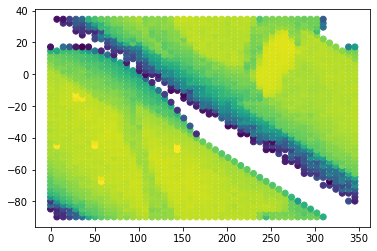

In [86]:
plt.scatter(my_array[0], my_array[1], c=my_array[2])